# **Outlier**  

🔍 **Apa itu Outlier?**  
Outlier adalah data yang memiliki nilai yang sangat berbeda dibandingkan dengan data lainnya dalam suatu dataset.  

⚠ **Mengapa Outlier Muncul?**  
Outlier bisa terjadi karena:  
✅ **Kesalahan pengukuran** –  
✅ **Kesalahan input data** –

✅ **Fenomena yang jarang terjadi** –

🧐 **Mengapa Outlier Penting?**  
- Karena Bisa menyebabkan hasil analisis yang bias.
- Karena Dapat menunjukkan kejadian khusus yang perlu dianalisis lebih lanjut.  
- Karena Bisa membantu dalam deteksi anomali dalam sebuah data.

## **Algoritma K-NN**  


### **Deteksi Outlier Menggunakan Algoritma K-NN**  

---

**1. Rumus Jarak Euclidean**  
Rumus **jarak Euclidean** untuk satu dimensi (misalnya suhu):  

$$
d(x_i, x_j) = |x_i - x_j|
$$

Di mana:  
- \( x_i \) = nilai suhu titik data ke-\( i \)  
- \( x_j \) = nilai suhu titik data ke-\( j \)  

> 🔹 Untuk **multi-dimensi**, gunakan rumus:  
> $$
> d(x_i, x_j) = \sqrt{\sum_{k=1}^{n} (x_{ik} - x_{jk})^2}
> $$

---

**2. Rata-rata Jarak ke K Tetangga Terdekat**  
Setelah menghitung jarak ke semua titik, kita pilih **K tetangga terdekat** dan hitung **rata-rata jaraknya**:

$$
\bar{d}_i = \frac{1}{K} \sum_{j=1}^{K} d(x_i, x_j)
$$

Di mana:  
- \( 𝑑𝑖 \) = rata-rata jarak ke **K** tetangga terdekat dari titik **\( x_i \)**  
- \( K \) = jumlah tetangga terdekat (misalnya **K = 2**)  
- \( 𝑑(x_i, x_j) \) = jarak dari titik **\( x_i \)** ke **tetangga ke-\( j \)**  

---

**3. Menentukan Threshold Outlier**  
Gunakan **mean + 2 * standar deviasi** sebagai batas outlier:  

$$
Threshold = \mu + 2\sigma
$$

Di mana:  
- \( μ \) = **mean** dari semua (𝑑𝑖)  
- \( σ \) = **standar deviasi** dari (𝑑𝑖)  

Jika **rata-rata jarak suatu titik lebih besar dari threshold**, maka titik tersebut **outlier**.

---



### **Contoh Deteksi Manual Outlier dengan K-NN (Suhu)**
Metode **K-Nearest Neighbors (K-NN)** dapat digunakan untuk mendeteksi outlier dengan menghitung rata-rata jarak suatu titik data ke tetangga terdekatnya. Jika jaraknya jauh lebih besar dibandingkan data lain, maka titik tersebut bisa dianggap sebagai **outlier**.

---

#### **Data**
Misalkan kita memiliki data suhu harian selama 10 hari (dalam °C):

    X = [28, 29, 30, 31, 29, 32, 30, 28, 27, 40]


Saya menggunakan **K = 2** dan **jarak Euclidean** untuk mendeteksi outlier.

---

### **Langkah-Langkah Deteksi Outlier**
#### **1. Hitung Jarak Antar Titik**
Hitung Jarak Antara Setiap Titik Data

- Gunakan metrik Euclidean Distance (jarak antara dua titik dalam satu dimensi).

#### **2. Menentukan Outlier**

- Nilai K = 2 (dua tetangga terdekat).

#### **3. Hitung Rata-rata jarak ke K tetangga terdekat**

- Jika rata-rata jarak suatu titik jauh lebih besar dibandingkan dengan titik lain, maka titik tersebut dianggap sebagai outlier.
---
#### **1. Hitung Jarak Antar Titik**
Gunakan **jarak Euclidean** (selisih absolut antara dua titik dalam satu dimensi).

| Suhu (°C) | Tetangga 1 | Jarak | Tetangga 2 | Jarak | Rata-rata Jarak |
|-----------|------------|-------|------------|-------|-----------------|
| 28        | 27         | 1     | 29         | 1     | (1+1)/2 = 1.0   |
| 29        | 28         | 1     | 30         | 1     | (1+1)/2 = 1.0   |
| 30        | 29         | 1     | 31         | 1     | (1+1)/2 = 1.0   |
| 31        | 30         | 1     | 32         | 1     | (1+1)/2 = 1.0   |
| 32        | 31         | 1     | 30         | 2     | (1+2)/2 = 1.5   |
| 27        | 28         | 1     | 29         | 2     | (1+2)/2 = 1.5   |
| 40        | 32         | 8     | 31         | 9     | (8+9)/2 = 8.5   |



#### **2. Menentukan Outlier**
- Hampir semua titik memiliki rata-rata jarak **1 - 1.5**.
- **Suhu 40°C memiliki rata-rata jarak ke tetangga sebesar 8.5**, jauh lebih besar dibandingkan lainnya.
- Maka, **suhu 40°C adalah outlier**.

#### **3. Hitung Rata-rata jarak ke K tetangga terdekat**

- Rata-rata jarak kebanyakan nilai = 1.0 hingga 1.5
- Suhu 40°C memiliki rata-rata jarak 8.5, yang jauh lebih besar dibandingkan yang lain.
- Maka Metode **K-NN Outlier** mendeteksi bahwa **40°C** adalah outlier dalam data ini.
---




### **Langkah-langkah Mendeteksi Outlier Dengan Algoritma K-NN Dengan Code**

In [57]:
!pip install pymysql #Install library Python yang menjadi koneksi dan interaksi dengan database MySQL

In [58]:
!pip install psycopg2-binary #Install library Python yang menjadi koneksi dan interaksi dengan database MySQL

In [59]:
!pip install pymysql pandas #instal PyMySQL (untuk koneksi MySQL) dan pandas (untuk manipulasi data dalam bentuk tabel).

In [60]:
import pandas as pd
from sqlalchemy import create_engine #koneksi database menggunakan SQLAlchemy.
import numpy as np #Operasi numerik dan array multidimensi.
import pandas as pd
from sklearn.neighbors import NearestNeighbors #Algoritma machine learning untuk pencarian tetangga terdekat (Nearest Neighbors).
from tabulate import tabulate #menampilkan data dalam format tabel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer

#### **Cek koneksi Database MySQL**
Periksa apakah code berhasil import data dari Database MySQL

In [61]:
import pymysql

# Konfigurasi koneksi
host = "mysqlpendata-ilhamalmafazt-dm.h.aivencloud.com"  # Ganti host dengan host dari Aiven.io
port = 19867    # Ganti posrt dengan posrt dari Aiven.io
user = "avnadmin" # Ganti user dengan user dari Aiven.io
password = "AVNS_vnxDk9lOvZgFnuKlezN" # Ganti password dengan password dari Aiven.io
database = "defaultdb" # Ganti database dengan database dari Aiven.io

# Buat koneksi
mysql_conn = pymysql.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database,
    ssl={'ssl': {}}  # Jika menggunakan SSL
)

#menampilkan data
cursor = mysql_conn.cursor()
cursor.execute("SELECT * FROM iris_sql.iris LIMIT 5;")
tampil = cursor.fetchall()
for data in tampil:
    print(data)
mysql_conn.close()


(1, 'Iris-setosa', 1.4, 0.2)
(2, 'Iris-setosa', 50.0, 20.0)
(3, 'Iris-setosa', 1.3, 0.2)
(4, 'Iris-setosa', 1.5, 0.2)
(5, 'Iris-setosa', 1.4, 0.2)


#### **Cek koneksi Database PostgreSQL**
Memeriksa apakah code berhasil import data dari Database PostgreSQL

In [62]:
import psycopg2

# Konfigurasi koneksi
host = "postgrependata-ilhamalmafazt-dm.i.aivencloud.com"
port = 19867
user = "avnadmin"
password = "AVNS_yBhPcNuf-iJ2fja4CBU"
database = "defaultdb"

# Buat koneksi
postgres_conn = psycopg2.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database,
    sslmode="require"
)
#menampilkan data
cursor = postgres_conn.cursor()
cursor.execute("SELECT * FROM postgre.postgre LIMIT 5;")
tampil = cursor.fetchall()
for data in tampil:
    print(data)
postgres_conn.close()




(1, 'Iris-setosa', 5.1, 3.5)
(3, 'Iris-setosa', 4.7, 3.2)
(4, 'Iris-setosa', 4.6, 3.1)
(5, 'Iris-setosa', 5.0, 3.6)
(6, 'Iris-setosa', 5.4, 3.9)


#### **MERGING DATA**
Code ini bertujuan untuk menghubungkan dua database yang berbeda menjadi satu

In [63]:
import pymysql
import psycopg2

# Konfigurasi koneksi MySQL (Aiven.io)
mysql_conn = pymysql.connect(
    host="mysqlpendata-ilhamalmafazt-dm.h.aivencloud.com",
    port=19867,
    user="avnadmin",
    password="AVNS_vnxDk9lOvZgFnuKlezN",
    database="defaultdb",
)

# Konfigurasi koneksi PostgreSQL (Aiven.io)
postgres_conn = psycopg2.connect(
    host="postgrependata-ilhamalmafazt-dm.i.aivencloud.com",
    port=19867,
    user="avnadmin",
    password="AVNS_yBhPcNuf-iJ2fja4CBU",
    database="defaultdb",
    sslmode="require"
)

# Ambil data dari MySQL
mysql_query = "SELECT id, `petal length`, `petal width` FROM iris_sql.iris;"
df_mysql = pd.read_sql(mysql_query, mysql_conn)

# Ambil data dari PostgreSQL
postgres_query = "SELECT * FROM postgre.postgre;"
df_postgres = pd.read_sql(postgres_query, postgres_conn)

# Tutup koneksi
mysql_conn.close()
postgres_conn.close()

# Gabungkan data secara vertikal
df_combined = pd.merge(df_postgres, df_mysql, on="id", how="left")

# Tampilkan data dalam format tabel yang lebih rapi
print(tabulate(df_combined, headers='keys', tablefmt='grid'))


<ipython-input-63-b119866ce4c3>:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mysql = pd.read_sql(mysql_query, mysql_conn)
<ipython-input-63-b119866ce4c3>:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_postgres = pd.read_sql(postgres_query, postgres_conn)


+-----+------+-----------------+----------------+---------------+----------------+---------------+
|     |   id | Class           |   sepal length |   sepal width |   petal length |   petal width |
+=====+======+=================+================+===============+================+===============+
|   0 |    1 | Iris-setosa     |            5.1 |           3.5 |            1.4 |           0.2 |
+-----+------+-----------------+----------------+---------------+----------------+---------------+
|   1 |    3 | Iris-setosa     |            4.7 |           3.2 |            1.3 |           0.2 |
+-----+------+-----------------+----------------+---------------+----------------+---------------+
|   2 |    4 | Iris-setosa     |            4.6 |           3.1 |            1.5 |           0.2 |
+-----+------+-----------------+----------------+---------------+----------------+---------------+
|   3 |    5 | Iris-setosa     |            5   |           3.6 |            1.4 |           0.2 |
+-----+---

#### **Code Deteksi Outlier dengan Algoritma K-NN - Euclidean Distance**

In [64]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors #import model Nearest Neighbors dari Library scikit-learn.
from tabulate import tabulate

# Menentukan fitur yang digunakan dalam perhitungan jarak
feature_column = ['petal length', 'petal width', 'sepal length', 'sepal width']

# Mengambil data fitur dari dataframe df_combined
X = df_combined[feature_column]

# Mengisi nilai yang kosong (NaN) dengan rata-rata dari masing-masing kolom
X = X.fillna(X.mean())

# jumlah tetangga terdekat (k)
nilai_k = 5

# model Nearest Neighbors dengan matriks Euclidean
knn = NearestNeighbors(n_neighbors=nilai_k, metric='euclidean')
knn.fit(X)

# Menghitung jarak Euclidean terdekat
distances, _ = knn.kneighbors(X)

# Membuat dataframe baru untuk menyimpan fitur dan jarak Euclidean rata-rata
df_features = pd.DataFrame(X, columns=feature_column)

# rata-rata jarak ke tetangga terdekat
df_features['euclidean_distance'] = distances.mean(axis=1)

print("Hasil dari perhitungan jarak menggunakan Euclidean")
print(tabulate(df_features[["sepal length", "sepal width", "petal length", "petal width", "euclidean_distance"]], headers="keys", tablefmt="grid"))

Hasil dari perhitungan jarak menggunakan Euclidean
+-----+----------------+---------------+----------------+---------------+----------------------+
|     |   sepal length |   sepal width |   petal length |   petal width |   euclidean_distance |
+=====+================+===============+================+===============+======================+
|   0 |            5.1 |           3.5 |            1.4 |           0.2 |             0.104853 |
+-----+----------------+---------------+----------------+---------------+----------------------+
|   1 |            4.7 |           3.2 |            1.3 |           0.2 |             0.183104 |
+-----+----------------+---------------+----------------+---------------+----------------------+
|   2 |            4.6 |           3.1 |            1.5 |           0.2 |             0.16483  |
+-----+----------------+---------------+----------------+---------------+----------------------+
|   3 |            5   |           3.6 |            1.4 |           0.2 |   

In [65]:
Q1 = df_features['euclidean_distance'].quantile(0.25)
Q3 = df_features['euclidean_distance'].quantile(0.75)

IQR = Q3 - Q1

# Menentukan batas bawah dan atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Ambil data outlier
# Merge df_features with df_combined to have all columns for outlier analysis
df_combined = pd.merge(df_combined, df_features[['euclidean_distance']], left_index=True, right_index=True)
outliers = df_combined[(df_combined['euclidean_distance'] < batas_bawah) |
                      (df_combined['euclidean_distance'] > batas_atas)]
outlier_terbesar = outliers.loc[outliers['euclidean_distance'].idxmax()]

print("Outlier Terbesar:")
print(tabulate(outlier_terbesar.to_frame().T, headers="keys", tablefmt="grid"))

Outlier Terbesar:
+-----+------+----------------+----------------+---------------+----------------+---------------+----------------------+
|     |   id | Class          |   sepal length |   sepal width |   petal length |   petal width |   euclidean_distance |
+=====+======+================+================+===============+================+===============+======================+
| 148 |  145 | Iris-virginica |             67 |            33 |             57 |            25 |              30.0345 |
+-----+------+----------------+----------------+---------------+----------------+---------------+----------------------+


#### **Visualisasi Outlier**

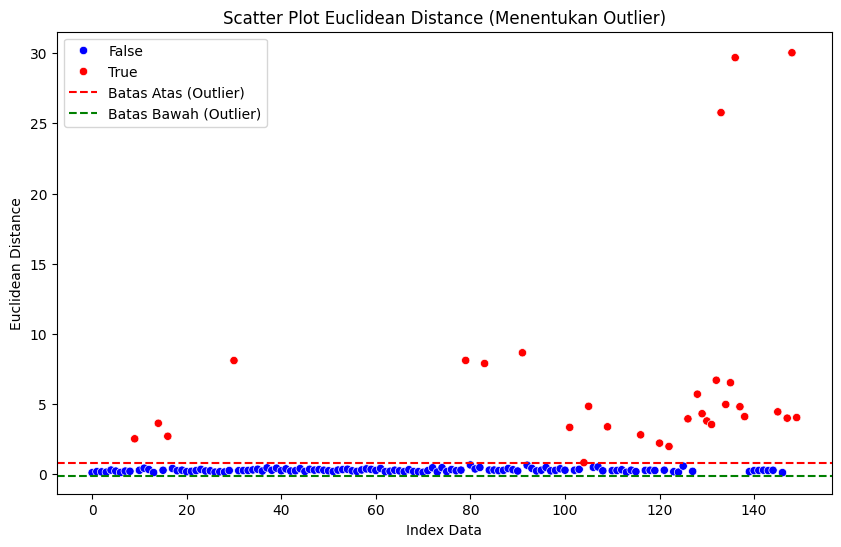

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure dengan ukuran 10x6
plt.figure(figsize=(10, 6))

# Scatter plot Euclidean Distance dengan warna merah untuk outlier
sns.scatterplot(x=range(len(df_combined)), y=df_combined['euclidean_distance'],
                hue=df_combined['euclidean_distance'] > batas_atas,
                palette={False: "blue", True: "red"})

# garis batas bawah dan atas
plt.axhline(y=batas_atas, color='r', linestyle='--', label="Batas Atas (Outlier)")
plt.axhline(y=batas_bawah, color='g', linestyle='--', label="Batas Bawah (Outlier)")

# judul, dan label sumbu
plt.legend()
plt.title("Scatter Plot Euclidean Distance (Menentukan Outlier)")
plt.xlabel("Index Data")
plt.ylabel("Euclidean Distance")

plt.show()


- Dapat dilihat bahwa mem-visualisasikan data sangat efektif untuk mendeteksi Outlier

## **Algoritma Local Outlier Factor (LOF)**

### 🔎 **Penjelasan Singkat**
Local Outlier Factor (LOF) adalah algoritma deteksi outlier berbasis density (kepadatan lokal) yang membandingkan kepadatan suatu titik data dengan tetangganya.

Jika kepadatan suatu titik jauh lebih rendah dibandingkan tetangganya, maka titik tersebut dianggap sebagai **outlier**.

---

#### 📚 **Konsep Dasar LOF**
LOF mengukur **Local Reachability Density (LRD)** dan menghitung **LOF Score** berdasarkan perbandingan LRD setiap titik dengan LRD tetangganya.

---

#### ✍ **Langkah-langkah Perhitungan LOF**
1. **Hitung k-distance**: Jarak ke tetangga ke-**k**
2. **Hitung reachability distance** setiap titik terhadap tetangganya:

$$
\text{reach\_dist}_k(p, o) = \max\left\{ k\text{-distance}(o), d(p, o) \right\}
$$

3. **Hitung Local Reachability Density (LRD)**:

$$
\text{LRD}_k(p) = \left( \frac{\sum_{o \in N_k(p)} \text{reach\_dist}_k(p, o)}{|N_k(p)|} \right)^{-1}
$$

4. **Hitung LOF Score**:

$$
\text{LOF}_k(p) = \frac{\sum_{o \in N_k(p)} \frac{\text{LRD}_k(o)}{\text{LRD}_k(p)}}{|N_k(p)|}
$$

---

#### 📈 **Interpretasi LOF**
- Jika **LOF ≈ 1**, maka data **normal (inlier)**
- Jika **LOF > 1**, maka data **potensi outlier**
- Semakin besar nilai LOF, semakin besar kemungkinan titik tersebut adalah **outlier**

---

#### ✅ **Kelebihan LOF**
- Bisa deteksi outlier **lokal** (berbeda dengan global outlier detection)
- Tidak mengasumsikan distribusi data tertentu
- Cocok untuk dataset yang **heterogen**

---

#### ⚠ **Kelemahan LOF**
- Butuh parameter **k** (jumlah tetangga)
- Sensitif terhadap pemilihan nilai **k**
- Perhitungan mahal untuk dataset sangat besar

---


### **Mendeteksi Outlier dengan Algoritma LOF**
#### Penjelasan Singkat Code

- ✅ Membersihkan data dari **outlier**
- ✅ Menggunakan **Local Outlier Factor (LOF)** sebagai algoritma deteksi
- ✅ Menyediakan dataset **bersih** untuk proses **analisis** atau **machine learning** berikutnya


In [67]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer

# Pastikan kolom yang digunakan tersedia di df_combined
selected_columns = ['petal length', 'petal width', 'sepal length', 'sepal width']

# Mengatasi missing values dengan imputasi (mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df_combined[selected_columns])

# Menerapkan Local Outlier Factor (LOF)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X_imputed)

# Tambahkan prediksi LOF ke dataframe (optional jika mau ditampilkan per baris)
df_combined['y_pred'] = y_pred

# Menentukan indeks data outlier
outlier_index = np.where(y_pred == -1)[0]  # Indeks data yang terdeteksi sebagai outlier

# Tampilkan data outlier dalam bentuk tabel
print("\nData Outlier yang terdeteksi LOF:")
print(tabulate(df_combined.iloc[outlier_index], headers='keys', tablefmt='grid'))

# Hapus kolom y_pred jika ingin membersihkan
columns_to_drop = ['y_pred']
df_combined.drop(columns=[col for col in columns_to_drop if col in df_combined.columns], inplace=True)


# # Menyaring hanya data yang bukan outlier (y_pred == 1)
df_cleaned = df_combined.iloc[y_pred == 1].reset_index(drop=True)

# # Menampilkan jumlah data sebelum dan sesudah filtering
print("\nStatistik Data:")
print(f"Jumlah total data sebelum filtering: {len(df_combined)}")
print(f"Jumlah total data setelah filtering (inlier saja): {len(df_cleaned)}")



Data Outlier yang terdeteksi LOF:
+-----+------+-----------------+----------------+---------------+----------------+---------------+----------------------+----------+
|     |   id | Class           |   sepal length |   sepal width |   petal length |   petal width |   euclidean_distance |   y_pred |
+=====+======+=================+================+===============+================+===============+======================+==========+
|  79 |  106 | Iris-virginica  |            7.6 |           3   |           66   |          21   |              8.10749 |       -1 |
+-----+------+-----------------+----------------+---------------+----------------+---------------+----------------------+----------+
|  91 |  118 | Iris-virginica  |            7.7 |           3.8 |           67   |          22   |              8.65393 |       -1 |
+-----+------+-----------------+----------------+---------------+----------------+---------------+----------------------+----------+
| 126 |   10 | Iris-setosa     |  

### **Mencari Data yang Diduga Outlier :**
#### **Penjelasan Singkat Kode**

- ✅ Mendeteksi data **outlier** menggunakan **Local Outlier Factor (LOF)**
- ✅ Menentukan data mana yang terdeteksi sebagai **outlier**
- ✅ Menampilkan **data outlier**
- ✅ Menghitung dan menampilkan **total outlier**


In [68]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer

# Persiapan Data
feature_column = ['petal length', 'petal width', 'sepal length', 'sepal width']
X = df_combined[feature_column]

# Mengisi missing value dengan rata-rata
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Deteksi Outlier Menggunakan LOF
contamination_value = 0.1  # Sesuaikan jika ingin lebih banyak/makin sedikit outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination_value)
y_pred = lof.fit_predict(X_imputed)

# Tambahkan hasil prediksi ke DataFrame
df_combined['outlier'] = y_pred  # Outlier akan otomatis di kolom paling kanan

# Data Statistik Outlier
total_data_awal = len(df_combined)
total_outliers = (df_combined['outlier'] == -1).sum()

columns_to_drop = ['id', 'euclidean_distance']
df_combined.drop(columns=[col for col in columns_to_drop if col in df_combined.columns], inplace=True)

print("\nData Lengkap dengan Kolom Outlier (1 = inlier, -1 = outlier):")
print(tabulate(df_combined, headers="keys", tablefmt="grid"))

# ================================
# Tampilkan Statistik Data
# ================================
print("\n==============================")
print(f"Total Data Awal     : {total_data_awal}")
print(f"Total Outlier       : {total_outliers}")
print(f"Total Data Inlier   : {total_data_awal - total_outliers}")
print("==============================")



Data Lengkap dengan Kolom Outlier (1 = inlier, -1 = outlier):
+-----+-----------------+----------------+---------------+----------------+---------------+-----------+
|     | Class           |   sepal length |   sepal width |   petal length |   petal width |   outlier |
+=====+=================+================+===============+================+===============+===========+
|   0 | Iris-setosa     |            5.1 |           3.5 |            1.4 |           0.2 |         1 |
+-----+-----------------+----------------+---------------+----------------+---------------+-----------+
|   1 | Iris-setosa     |            4.7 |           3.2 |            1.3 |           0.2 |         1 |
+-----+-----------------+----------------+---------------+----------------+---------------+-----------+
|   2 | Iris-setosa     |            4.6 |           3.1 |            1.5 |           0.2 |         1 |
+-----+-----------------+----------------+---------------+----------------+---------------+-----------+
|

### **Data Bersih Setelah Menghapus Outlier (Metode LOF)**


In [69]:

# Persiapan Data
feature_column = ['petal length', 'petal width', 'sepal length', 'sepal width']
X = df_combined[feature_column]

# Mengisi missing value dengan rata-rata
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Deteksi Outlier Menggunakan LOF
contamination_value = 0.1  # Sesuaikan jika ingin lebih banyak/makin sedikit outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination_value)
y_pred = lof.fit_predict(X_imputed)

# Tambahkan hasil prediksi ke DataFrame
df_combined['outlier'] = y_pred

# Data Statistik Outlier
total_data_awal = len(df_combined)
total_outliers = (df_combined['outlier'] == -1).sum()

# Filter hanya inlier (outlier == 1)
df_clean = df_combined[df_combined['outlier'] == 1].reset_index(drop=True)
total_bersih = len(df_clean)

# Hapus Kolom yang Tidak Diperlukan
columns_to_drop = ['euclidean_distance', 'y_pred', 'outlier']
df_clean.drop(columns=[col for col in columns_to_drop if col in df_clean.columns], inplace=True)

# Menampilkan Data Bersih
print("\nData Bersih Setelah Menghapus Outlier (Metode LOF)")
print(tabulate(df_clean, headers="keys", tablefmt="grid"))

# Menampilkan Total Data
print("\n==============================")
print(f"Total Data Awal     : {total_data_awal}")
print(f"Total Outlier       : {total_outliers}")
print(f"Total Data Bersih   : {total_bersih}")
print("==============================")



Data Bersih Setelah Menghapus Outlier (Metode LOF)
+-----+-----------------+----------------+---------------+----------------+---------------+
|     | Class           |   sepal length |   sepal width |   petal length |   petal width |
+=====+=================+================+===============+================+===============+
|   0 | Iris-setosa     |            5.1 |           3.5 |            1.4 |           0.2 |
+-----+-----------------+----------------+---------------+----------------+---------------+
|   1 | Iris-setosa     |            4.7 |           3.2 |            1.3 |           0.2 |
+-----+-----------------+----------------+---------------+----------------+---------------+
|   2 | Iris-setosa     |            4.6 |           3.1 |            1.5 |           0.2 |
+-----+-----------------+----------------+---------------+----------------+---------------+
|   3 | Iris-setosa     |            5   |           3.6 |            1.4 |           0.2 |
+-----+-----------------+---

### **Membandingkan Akurasi**


#### ✅ 1. Persiapan Data dan Encoding Kelas
- Mengambil fitur utama: **"petal length"** dan **"petal width"** sebagai input (X).
- Target klasifikasi diambil dari kolom **"Class"**.
- Target dikonversi ke bentuk numerik menggunakan **LabelEncoder()** agar bisa diproses oleh algoritma KNN.

---

#### ✅ 2. Membuat dan Melatih Model KNN (Tanpa Menghapus Outlier)
- Dataset dibagi menjadi **data latih (80%)** dan **data uji (20%)** menggunakan `train_test_split`.
- Model menggunakan **Pipeline** yang terdiri dari:
  - `StandardScaler()` untuk normalisasi data.
  - `KNeighborsClassifier(n_neighbors=11)` sebagai algoritma KNN.
- Model dilatih dan diuji **langsung** menggunakan data **yang masih mengandung outlier**.
- Evaluasi model dilakukan menggunakan:
  - `classification_report`
  - `accuracy_score`

---

#### ✅ 3. Deteksi Outlier Menggunakan Local Outlier Factor (LOF)
- **LOF (Local Outlier Factor)** digunakan untuk mendeteksi data yang dianggap outlier berdasarkan jarak dengan tetangga terdekatnya.
- Parameter LOF:
  - `n_neighbors=20` : jumlah tetangga terdekat yang dihitung.
  - `contamination=0.1` : mengasumsikan sekitar 10% data adalah outlier.
- Hasil LOF:
  - Label `-1` menunjukkan data **outlier**.
  - Label `1` menunjukkan data **inlier** atau data normal.

---

#### ✅ 4. Membersihkan Data dari Outlier
- Data yang terdeteksi sebagai **outlier** (label `-1`) dihapus dari dataset.
- Hanya data **inlier** yang tersisa dan digunakan untuk proses pelatihan ulang model.

---

#### ✅ 5. Melatih Ulang Model KNN Setelah Outlier Dihapus
- Model KNN dilatih ulang dengan data **yang sudah bersih (tanpa outlier)**.
- Proses training dan testing sama seperti model sebelumnya:
  - Split data
  - Pipeline (StandardScaler + KNN)
- Model diuji ulang dan hasilnya dibandingkan.

---

#### ✅ 6. Evaluasi dan Perbandingan Hasil
- Menampilkan hasil evaluasi model **sebelum** dan **sesudah** outlier dihapus.
- Evaluasi menggunakan:
  - `classification_report` (precision, recall, f1-score)
  - `accuracy_score`
- Tujuan evaluasi:
  - Melihat apakah **menghapus outlier meningkatkan performa model**.
  - Membuktikan bahwa **outlier berpengaruh terhadap akurasi model**.

---

#### 📈 Kesimpulan:
- **Outlier** dalam dataset bisa **menurunkan akurasi model** karena data tidak representatif.
- Dengan menghapus outlier, model menjadi lebih **stabil, akurat**, dan **mampu melakukan generalisasi** lebih baik pada data baru.


In [70]:
feature_columns = ["petal length", "petal width"]
X = df_combined[feature_columns]
y = df_combined["Class"]

# Encode target class menjadi angka
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 1. MODEL DENGAN OUTLIER
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

pipeline_ori = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

pipeline_ori.fit(X_train_ori, y_train_ori)
y_pred_ori = pipeline_ori.predict(X_test_ori)

print("\n HASIL MODEL DENGAN OUTLIER :")
print(classification_report(y_test_ori, y_pred_ori, target_names=label_encoder.classes_))
print(f"Akurasi: {accuracy_score(y_test_ori, y_pred_ori):.4f}")

# 2. DETEKSI DAN HAPUS OUTLIER
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)

# Tandai outlier
df_combined["outlier"] = outlier_labels

# Filter hanya data inlier
df_cleaned = df_combined[df_combined["outlier"] == 1].drop(columns=["outlier"])

# 3. MODEL SETELAH OUTLIER DIHAPUS
X_clean = df_cleaned[feature_columns]
y_clean = label_encoder.transform(df_cleaned["Class"])

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

pipeline_clean = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

pipeline_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = pipeline_clean.predict(X_test_clean)

print("\nHASIL MODEL SETELAH OUTLIER DIHAPUS :")
print(classification_report(y_test_clean, y_pred_clean, target_names=label_encoder.classes_))
print(f"Akurasi: {accuracy_score(y_test_clean, y_pred_clean):.4f}")



 HASIL MODEL DENGAN OUTLIER :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.80      0.89        10
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.73      1.00      0.84         8

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.90        30
   weighted avg       0.93      0.90      0.90        30

Akurasi: 0.9000

HASIL MODEL SETELAH OUTLIER DIHAPUS :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.86      0.86      0.86         7

       accuracy                           0.93        27
      macro avg       0.92      0.92      0.92        27
   weighted avg       0.93      0.93      0.93        27

Akurasi: 0.9259


## **Naive Bayes Classifier**

#### 🔎 **Penjelasan Singkat**
Naive Bayes adalah algoritma klasifikasi berbasis probabilitas yang menggunakan **Teorema Bayes** dengan asumsi sederhana bahwa fitur saling **independen**.

Naive Bayes banyak digunakan karena:
- Cepat dan efisien
- Cocok untuk dataset besar
- Mudah diinterpretasikan secara probabilistik

---
#### ✅ **Keunggulan Naive Bayes**
- Cepat meski data besar
- Tidak butuh parameter tuning rumit
- Cocok untuk baseline model di banyak kasus

---

#### ⚠ **Kelemahan**
- Asumsi independensi jarang terpenuhi di dunia nyata
- Sensitif terhadap data dengan variansi sangat berbeda antar kelas

#### 📚 **Teorema Bayes**

$$
P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}
$$

**Keterangan:**
- \( P(C|X) \) : Probabilitas kelas \( C \) diberikan fitur \( X \)
- \( P(X|C) \) : Probabilitas fitur \( X \) terjadi jika kelas \( C \) benar
- \( P(C) \) : Probabilitas awal (prior) kelas \( C \)
- \( P(X) \) : Probabilitas fitur \( X \) terjadi (konstanta untuk semua kelas)

---

#### 🧠 **Naive Bayes Gaussian**

Untuk data numerik yang diasumsikan mengikuti distribusi Gaussian (Normal), rumusnya menjadi:

$$
P(x_i | C) = \frac{1}{\sqrt{2\pi\sigma_C^2}} \exp\left(-\frac{(x_i - \mu_C)^2}{2\sigma_C^2}\right)
$$

**Keterangan:**
- \( \mu_C \) : Rata-rata fitur \( x_i \) pada kelas \( C \)
- \( \sigma_C^2 \) : Variansi fitur \( x_i \) pada kelas \( C \)

---

#### 📈 **Langkah-langkah Perhitungan Manual**
1. Hitung **mean (μ)** dan **variansi (σ²)** setiap fitur untuk masing-masing kelas
2. Hitung probabilitas tiap fitur \( P(x_i | C) \) menggunakan rumus Gaussian
3. Hitung likelihood total \( P(X|C) \) dengan mengalikan semua \( P(x_i | C) \)
4. Hitung posterior probability \( P(C|X) \) untuk semua kelas
5. Pilih kelas dengan nilai **posterior probability terbesar** sebagai hasil prediksi

---


### **-Implementasi Naive Biyes pada Data yang ada Outlier**

In [71]:
from sklearn.naive_bayes import GaussianNB

# ==============================
# Training Naive Bayes dengan semua data (inlier dan outlier)
# ==============================
gnb = GaussianNB()
gnb.fit(X_imputed, y)  # Training dengan semua data

# ==============================
# Hasil Probabilitas dan Prediksi Manual
# ==============================
# Menghitung probabilitas prediksi untuk setiap baris
probs = gnb.predict_proba(X_imputed)
predictions = gnb.predict(X_imputed)

# Buat dataframe untuk tampilkan perhitungan
result_df = df_combined.copy()
result_df['Predicted Class'] = predictions
result_df['Probabilities'] = probs.tolist()  # Simpan seluruh probabilitas tiap kelas

# ==============================
# Tampilkan hasil
# ==============================
print("\n=== Hasil Perhitungan Naive Bayes (Probabilitas dan Prediksi) ===")
for idx, row in result_df.iterrows():
    print(f"Data ke-{idx+1}")
    print(f"Fitur              : {row[feature_column].values}")
    print(f"Data               : {'INLIER'}")
    print(f"Probabilitas Kelas : {row['Probabilities']}")
    print(f"Prediksi Kelas     : {row['Predicted Class']}")
    print("-" * 50)


=== Hasil Perhitungan Naive Bayes (Probabilitas dan Prediksi) ===
Data ke-1
Fitur              : [1.4 0.2 5.1 3.5]
Data               : INLIER
Probabilitas Kelas : [0.3848828317992492, 0.5579918762316123, 0.05712529196913772]
Prediksi Kelas     : Iris-versicolor
--------------------------------------------------
Data ke-2
Fitur              : [1.3 0.2 4.7 3.2]
Data               : INLIER
Probabilitas Kelas : [0.3856050400799513, 0.5570291145355765, 0.057365845384471835]
Prediksi Kelas     : Iris-versicolor
--------------------------------------------------
Data ke-3
Fitur              : [1.5 0.2 4.6 3.1]
Data               : INLIER
Probabilitas Kelas : [0.38357382113542693, 0.5594347176994826, 0.056991461165090664]
Prediksi Kelas     : Iris-versicolor
--------------------------------------------------
Data ke-4
Fitur              : [1.4 0.2 5.0 3.6]
Data               : INLIER
Probabilitas Kelas : [0.3849918813615935, 0.5578861721767725, 0.05712194646163428]
Prediksi Kelas     : Iris-

### **-Implementasi Naive Biyes pada Data Sudah Bersih**


In [72]:
from sklearn.naive_bayes import GaussianNB

# ==============================
# Filter hanya inlier
# ==============================
df_inlier = df_combined[df_combined['outlier'] == 1].reset_index(drop=True)
X_inlier = df_inlier[feature_column]
y_inlier = df_inlier['Class']

# ==============================
# Training Naive Bayes dengan data INLIER saja
# ==============================
gnb = GaussianNB()
gnb.fit(X_inlier, y_inlier)

# ==============================
# Prediksi HANYA data bersih (inlier)
# ==============================
probs = gnb.predict_proba(X_inlier)
predictions = gnb.predict(X_inlier)

# ==============================
# Tampilkan hasil
# ==============================
print("\n=== Hasil Naive Bayes (Hanya Data Inlier) ===")
for idx, row in df_inlier.iterrows():
    print(f"Data ke-{idx+1}")
    print(f"Fitur              : {row[feature_column].values}")
    print(f"Probabilitas Kelas : {probs[idx]}")
    print(f"Prediksi Kelas     : {predictions[idx]}")
    print("-" * 50)



=== Hasil Naive Bayes (Hanya Data Inlier) ===
Data ke-1
Fitur              : [1.4 0.2 5.1 3.5]
Probabilitas Kelas : [9.98811850e-01 1.18814979e-03 4.06432551e-27]
Prediksi Kelas     : Iris-setosa
--------------------------------------------------
Data ke-2
Fitur              : [1.3 0.2 4.7 3.2]
Probabilitas Kelas : [9.98363378e-01 1.63662229e-03 1.13110626e-27]
Prediksi Kelas     : Iris-setosa
--------------------------------------------------
Data ke-3
Fitur              : [1.5 0.2 4.6 3.1]
Probabilitas Kelas : [9.98820698e-01 1.17930178e-03 1.92345131e-26]
Prediksi Kelas     : Iris-setosa
--------------------------------------------------
Data ke-4
Fitur              : [1.4 0.2 5.0 3.6]
Probabilitas Kelas : [9.98812461e-01 1.18753929e-03 4.05975912e-27]
Prediksi Kelas     : Iris-setosa
--------------------------------------------------
Data ke-5
Fitur              : [1.7 0.4 5.4 3.9]
Probabilitas Kelas : [9.92534087e-01 7.46591306e-03 5.67570058e-22]
Prediksi Kelas     : Iris-setosa